In [1]:
import xgboost
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
import matplotlib.pyplot as plt
import sklearn

In [2]:
training_df = pd.read_csv('data-1-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [4]:
training_df = pd.read_csv('data-10-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [5]:
training_df = pd.read_csv('data-10-year-normalized.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [6]:
def train_val_split(X, y, val_size, random_state):
    # TODO: implement your own train_val_split
    
    
    X_train = X.sample(frac = 0.9,random_state = random_state)
    X_temp = X.drop(X_train.index)
    y_train = y.sample(frac = 0.9,random_state = random_state)
    y_temp = y.drop(y_train.index)
    
    X_val = X_temp.sample(frac = 0.5,random_state = random_state)
    X_test = X_temp.drop(X_val.index)
    y_val = y_temp.sample(frac = 0.5,random_state = random_state)
    y_test = y_temp.drop(y_val.index) 
    return X_train, X_val, X_test, y_train, y_val, y_test

In [7]:
random_state = random.getstate()[1][0]

X_train, X_val, X_test, y_train, y_val, y_test = train_val_split(X, y, X.size, random_state)

print(X_train)
#print(y_train)

       longitude  latitude  house_age      area  elevator  janitor  \
24076   0.809873  0.988995   0.000000  0.017341         1        1   
211     0.949150  0.937621   0.022523  0.003425         1        1   
21485   0.815973  0.989614   0.016517  0.007712         1        1   
40794   0.975406  0.918148   0.024024  0.015867         1        0   
44356   0.884604  0.935919   0.000000  0.011433         1        1   
...          ...       ...        ...       ...       ...      ...   
18802   0.857984  0.937381   0.000000  0.011119         1        1   
33832   0.993111  0.915875   0.027027  0.012055         1        1   
60988   0.914786  0.957280   0.000000  0.014619         1        1   
24830   0.981277  0.919559   0.016517  0.005459         1        1   
39305   0.985127  0.918224   0.000000  0.012105         1        1   

       parking_space  closing_year  bedroom  living_room  ...  \
24076           0.10             0  0.09375     0.095238  ...   
211             0.00         

In [106]:
#n_estimators
#minchildweight以及max_depth
#gamma
#subsample以及colsample_bytree
#regalpha以及reglambda
#learning_rate

params = {'learning_rate': 0.1, 'n_estimators': 1600, 'max_depth': 10, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.87, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,"early_stopping_rounds":20}
cv_params = {'colsample_bytree': [i*0.01 for i in range(65,90,5)],'subsample': [i*0.01 for i in range(78,96,1)]}

xgb = xgboost.XGBRegressor(**params)



In [107]:
grid = sklearn.model_selection.GridSearchCV(estimator=xgb, param_grid=cv_params, scoring='r2', verbose=4,cv = 5)
grid.fit(X_train, y_train,
         
        eval_set=[(X_val, y_val)],
        verbose=False)
print('参数的最佳取值：{0}'.format(grid.best_params_))
print('最佳模型得分:{0}'.format(grid.best_score_))
print(grid.cv_results_['rank_test_score'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, subsample=0.87;, score=0.907 total time=  12.0s
[CV 2/5] END colsample_bytree=0.8, subsample=0.87;, score=0.911 total time=  11.0s
[CV 3/5] END colsample_bytree=0.8, subsample=0.87;, score=0.912 total time=  14.2s
[CV 4/5] END colsample_bytree=0.8, subsample=0.87;, score=0.914 total time=  17.9s
[CV 5/5] END colsample_bytree=0.8, subsample=0.87;, score=0.915 total time=  12.2s
参数的最佳取值：{'colsample_bytree': 0.8, 'subsample': 0.87}
最佳模型得分:0.9116328475462435
[1]


In [108]:
# score = xgb.score(X_train,y_train)
# predictions = xgb.predict(X_train)
# mse = ((predictions - y_train)**2).sum()
# print(abs((predictions - y_train)/y_train).sum())
# print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))

# score = xgb.score(X_val,y_val)
# predictions = xgb.predict(X_val)
# mse = ((predictions - y_val)**2).sum()
# print(abs((predictions - y_val)/y_val).sum())
# print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))
xgb.fit(X_train,y_train, eval_set=[(X_val, y_val)],verbose=False)
score = xgb.score(X_test,y_test)
predictions = xgb.predict(X_test)
mse = ((predictions - y_test)**2).sum()
print(abs((predictions - y_test)/y_test).sum())
print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))


393.17449115623015
0.9025806737783877 1608744.9486272917 26566189791196.387


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.568339 to fit

(process:14620): GLib-GIO-WARNING **: 02:19:12.853: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:14620): GLib-GIO-WARNING **: 02:19:12.885: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


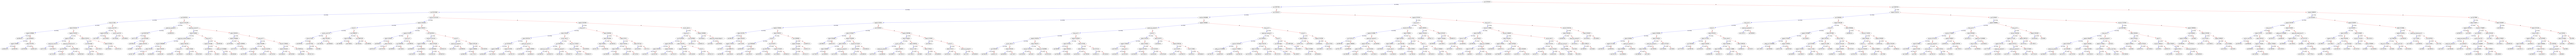

In [123]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("xgb.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(X_train.columns)
plot_tree(xgb, # 引入上面訓練好的xgb model 
          num_trees=0, # 第幾棵樹
          fmap="xgb.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(570, 380)

plt.show()


In [103]:
for i in range(len(grid.cv_results_['rank_test_score'])):
    print('{:3d}'.format(grid.cv_results_['rank_test_score'][i]),end = '')
    if grid.cv_results_['rank_test_score'][i] < 10:
        print('_',end = '')
    else:
        print(' ',end = '')
    if i%13 == 12:
        print()

105  58  21  27  56  83  98  85  79  97  89  47  95 
 82  62   9_ 61  44  20  13  35  54  57  63  60 108 
 52  38  48  28  74  39  30  45 100  71 109  80  68 
 33 115  70  94 101  67  65  64 111  93  77 107  99 
 42  76  19  41  24  26   2_ 23  50  46  17  53  37 
 34  59  16  73   8_ 10  15  31  22   3_ 81  11  29 
 49  72  75   5_  6_  4_  1_ 36   7_ 25  66  43  96 
 40  84  69  12  51  14  18 113  55 106  86 117 102 
 87 112 104  78  90  32  88 103  91 110  92 116 114 
